In [3]:
import json
import pandas as pd
import os

Sample_ENS_List = []

All_Samples = []

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29_SeperatedSample"):
    string = os.path.basename(dirname)

    # JSON file
    f = open (r'C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\scratch\preds\conv_lstm\version_29_SeperatedSample\\' + string, "r")
    
    # Reading from file
    data = json.loads(f.read())
    Sample_ENS_List.append(data['EarthNetScore'])

    Temp = [string,data['EarthNetScore']]
    All_Samples.append(Temp)
    print('Added the following sample to Dataframe:', string)

    f.close()

df2 = pd.DataFrame(All_Samples, columns = ['Sample','EarthNet Score'])

Output = r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\ScorePerSample.csv"
df2.to_csv(Output)

Added the following sample to Dataframe: 29SND_2017-06-20_2017-11-16_1977_2105_1721_1849_30_110_26_10_ens.json
Added the following sample to Dataframe: 29SND_2017-06-20_2017-11-16_2617_2745_1465_1593_40_120_22_10_ens.json
Added the following sample to Dataframe: 29SND_2017-06-20_2017-11-16_953_1081_3641_3769_14_94_56_136._ens.json
Added the following sample to Dataframe: 29SND_2017-06-30_2017-11-26_1081_1209_1721_1849_16_96_26_106_ens.json
Added the following sample to Dataframe: 29SND_2017-06-30_2017-11-26_1209_1337_1977_2105_18_98_30_110_ens.json
Added the following sample to Dataframe: 29SND_2017-06-30_2017-11-26_2617_2745_3897_4025_40_120_60_14_ens.json
Added the following sample to Dataframe: 29SND_2017-06-30_2017-11-26_3129_3257_4153_4281_48_128_64_14_ens.json
Added the following sample to Dataframe: 29SND_2017-06-30_2017-11-26_4281_4409_2489_2617_66_146_38_11_ens.json
Added the following sample to Dataframe: 29SND_2017-06-30_2017-11-26_4409_4537_5049_5177_68_148_78_15_ens.json
A

In [4]:
df2['EarthNet Score']

0       0.334624
1       0.310201
2       0.342277
3       0.356196
4       0.343955
          ...   
4214    0.375593
4215    0.370914
4216    0.324815
4217    0.342865
4218    0.324963
Name: EarthNet Score, Length: 4219, dtype: float64

In [5]:
List_TimeSeries = []

SampleScores = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\ScorePerSample.csv")

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileDFs"):
    string = os.path.basename(dirname)
    TileDF = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileDFs\\" + string)
    List_TimeSeries.append(TileDF)

DF_AllSamplesTimeseries = pd.concat(List_TimeSeries)
DF_AllSamplesTimeseries.set_index(['Location'],inplace=True)
DF_AllSamplesTimeseries['sample_mean'] = DF_AllSamplesTimeseries.mean(axis=1, numeric_only=True, skipna=True).round(3)
DF_AllSamplesTimeseries['sample_std'] = DF_AllSamplesTimeseries.std(axis=1, numeric_only=True, skipna=True).round(3)

DF_AllSamplesTimeseries['SampleEv'] = SampleScores['Sample'].values
DF_AllSamplesTimeseries['EarthNet Score Sample'] = SampleScores['EarthNet Score'].values




DF_AllSamplesTimeseries

,5,10,15,20,25,30,35,40,45,50,...,75,80,85,90,95,100,sample_mean,sample_std,SampleEv,EarthNet Score Sample
Location,,,,,,,,,,,,,,,,,,,,,
target_29SND_2017-06-20_2017-11-16_1977_2105_1721_1849_30_110_26_106.npz,0.06260,0.06620,0.07630,NaN,0.06670,0.06555,0.06476,NaN,0.06720,NaN,...,0.06250,0.06256,0.12820,0.06290,0.06290,0.06305,0.069,0.015,29SND_2017-06-20_2017-11-16_1977_2105_1721_184...,0.334624
target_29SND_2017-06-20_2017-11-16_2617_2745_1465_1593_40_120_22_102.npz,0.07010,0.08660,0.08190,NaN,0.06740,0.06305,0.06250,NaN,0.07240,NaN,...,0.06250,0.06250,0.06635,0.05112,0.06250,0.06250,0.067,0.008,29SND_2017-06-20_2017-11-16_2617_2745_1465_159...,0.310201
target_29SND_2017-06-20_2017-11-16_953_1081_3641_3769_14_94_56_136.npz,0.06250,0.06256,0.06274,NaN,0.06256,0.06256,0.06256,NaN,0.06250,NaN,...,0.04388,0.06250,0.10290,0.06116,0.04312,0.06250,0.061,0.013,29SND_2017-06-20_2017-11-16_953_1081_3641_3769...,0.342277
target_29SND_2017-06-30_2017-11-26_1081_1209_1721_1849_16_96_26_106.npz,0.06256,NaN,0.06250,0.06250,0.06250,NaN,0.06250,NaN,0.06250,0.06250,...,0.12500,0.06250,0.06250,0.06250,0.06250,NaN,0.066,0.015,29SND_2017-06-30_2017-11-26_1081_1209_1721_184...,0.356196
target_29SND_2017-06-30_2017-11-26_1209_1337_1977_2105_18_98_30_110.npz,0.06250,NaN,0.06260,0.06250,0.06250,NaN,0.06250,NaN,0.06256,0.06256,...,0.15930,0.06250,0.06250,0.06250,0.06250,NaN,0.069,0.023,29SND_2017-06-30_2017-11-26_1209_1337_1977_210...,0.343955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
target_34VFQ_2018-05-12_2018-10-08_2745_2873_1465_1593_42_122_22_102.npz,0.11900,0.07320,0.08190,0.06250,0.12670,0.06256,0.10364,0.2284,0.12500,0.12500,...,0.12317,0.03160,0.25000,0.07550,0.12500,0.12500,0.105,0.053,34VFQ_2018-05-12_2018-10-08_2745_2873_1465_159...,0.375593
target_34VFQ_2018-05-12_2018-10-08_5305_5433_1337_1465_82_162_20_100.npz,0.06250,0.06250,0.06250,0.06250,0.12384,0.06250,0.06510,0.1250,0.17290,0.08340,...,0.12500,0.06323,0.16470,0.12500,0.03876,0.12500,0.093,0.038,34VFQ_2018-05-12_2018-10-08_5305_5433_1337_146...,0.370914
target_34VFQ_2018-06-01_2018-10-28_2873_3001_953_1081_44_124_14_94.npz,0.16770,0.06616,0.06750,0.12500,0.12500,0.16700,0.08060,0.0625,0.06360,0.06250,...,0.12500,0.12500,0.10095,0.12500,0.06250,0.06250,0.099,0.037,34VFQ_2018-06-01_2018-10-28_2873_3001_953_1081...,0.324815


In [6]:
List_TimeSeries1 = []

SampleScores1 = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\ScorePerSample.csv")

for dirname1 in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileDFs_std"):
    string1 = os.path.basename(dirname1)
    TileDF1 = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\TileDFs_std\\" + string1)
    List_TimeSeries1.append(TileDF1)

DF_AllSamplesTimeseries1 = pd.concat(List_TimeSeries1)
DF_AllSamplesTimeseries1.set_index(['Location'],inplace=True)
DF_AllSamplesTimeseries1['sample_std'] = DF_AllSamplesTimeseries1.std(axis=1, numeric_only=True, skipna=True).round(3)

DF_AllSamplesTimeseries1['SampleEv'] = SampleScores['Sample'].values
DF_AllSamplesTimeseries1['EarthNet Score Sample'] = SampleScores['EarthNet Score'].values




DF_AllSamplesTimeseries1

,5,10,15,20,25,30,35,40,45,50,...,70,75,80,85,90,95,100,sample_std,SampleEv,EarthNet Score Sample
Location,,,,,,,,,,,,,,,,,,,,,
target_29SND_2017-06-20_2017-11-16_1977_2105_1721_1849_30_110_26_106.npz,0.04126,0.04870,0.05356,NaN,0.04803,0.04610,0.04758,NaN,0.04868,NaN,...,0.04675,0.03693,0.03470,0.15730,0.039100,0.04126,0.04184,0.028,29SND_2017-06-20_2017-11-16_1977_2105_1721_184...,0.334624
target_29SND_2017-06-20_2017-11-16_2617_2745_1465_1593_40_120_22_102.npz,0.05292,0.05920,0.05832,NaN,0.04970,0.04510,0.04376,NaN,0.04956,NaN,...,0.04974,0.03143,0.02975,0.06520,0.031980,0.03592,0.03897,0.013,29SND_2017-06-20_2017-11-16_2617_2745_1465_159...,0.310201
target_29SND_2017-06-20_2017-11-16_953_1081_3641_3769_14_94_56_136.npz,0.03574,0.03980,0.03790,NaN,0.03705,0.03480,0.03674,NaN,0.03394,NaN,...,0.02292,0.02979,0.03543,0.07340,0.036440,0.03330,0.04400,0.010,29SND_2017-06-20_2017-11-16_953_1081_3641_3769...,0.342277
target_29SND_2017-06-30_2017-11-26_1081_1209_1721_1849_16_96_26_106.npz,0.03882,NaN,0.03494,0.03375,0.03568,NaN,0.03616,NaN,0.03705,0.03348,...,0.03424,0.10450,0.04010,0.03232,0.043330,0.03455,NaN,0.017,29SND_2017-06-30_2017-11-26_1081_1209_1721_184...,0.356196
target_29SND_2017-06-30_2017-11-26_1209_1337_1977_2105_18_98_30_110.npz,0.03754,NaN,0.03937,0.03760,0.03992,NaN,0.03940,NaN,0.04132,0.03550,...,0.03740,0.16990,0.04062,0.04050,0.047100,0.04430,NaN,0.033,29SND_2017-06-30_2017-11-26_1209_1337_1977_210...,0.343955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
target_34VFQ_2018-05-12_2018-10-08_2745_2873_1465_1593_42_122_22_102.npz,0.10077,0.05774,0.08450,0.03268,0.13700,0.04410,0.13330,0.21150,0.13780,0.12590,...,0.11066,0.12660,0.02144,0.19340,0.095150,0.10530,0.04248,0.053,34VFQ_2018-05-12_2018-10-08_2745_2873_1465_159...,0.375593
target_34VFQ_2018-05-12_2018-10-08_5305_5433_1337_1465_82_162_20_100.npz,0.04572,0.05524,0.05176,0.03058,0.10970,0.04922,0.06604,0.12080,0.17640,0.09595,...,0.09040,0.17830,0.02509,0.18070,0.130600,0.03168,0.01863,0.052,34VFQ_2018-05-12_2018-10-08_5305_5433_1337_146...,0.370914
target_34VFQ_2018-06-01_2018-10-28_2873_3001_953_1081_44_124_14_94.npz,0.18420,0.06805,0.06216,0.19040,0.09830,0.22240,0.05093,0.05545,0.05920,0.04672,...,0.10420,0.12990,0.03029,0.05478,0.012924,0.06600,0.06744,0.068,34VFQ_2018-06-01_2018-10-28_2873_3001_953_1081...,0.324815


In [7]:
ListTileNames = []
ListSTDs =[]
AverageDeviationPerTile = pd.DataFrame()

for dirname in os.listdir(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\data\en21ds_full\iid_test_split\target"):
    string = os.path.basename(dirname)

    STDmeanperTile = DF_AllSamplesTimeseries1[DF_AllSamplesTimeseries1['SampleEv'].str[0:5] == string]['sample_std'].mean()
    ListSTDs.append(STDmeanperTile)
    ListTileNames.append(string)

AverageDeviationPerTile['Tiles'] = ListTileNames
AverageDeviationPerTile['Average STD'] = ListSTDs


DeviationOutput = r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\AverageSTDperTile.csv"
AverageDeviationPerTile.to_csv(DeviationOutput)

In [8]:
VGrouped = DF_AllSamplesTimeseries.groupby(['sample_std'])['EarthNet Score Sample'].mean()
VGrouped

sample_std
0.000    0.370883
0.001    0.356629
0.002    0.357652
0.003    0.346138
0.004    0.339890
           ...   
0.086    0.316029
0.087    0.369357
0.088    0.380463
0.089    0.371464
0.091    0.375848
Name: EarthNet Score Sample, Length: 91, dtype: float64

In [9]:
VGrouped1 = DF_AllSamplesTimeseries1.groupby(['sample_std'])['EarthNet Score Sample'].mean()
VGrouped1

sample_std
0.001    0.344134
0.003    0.354740
0.004    0.371357
0.005    0.360652
0.006    0.354591
           ...   
0.119    0.373918
0.121    0.357891
0.122    0.366493
0.124    0.325875
0.132    0.366045
Name: EarthNet Score Sample, Length: 115, dtype: float64

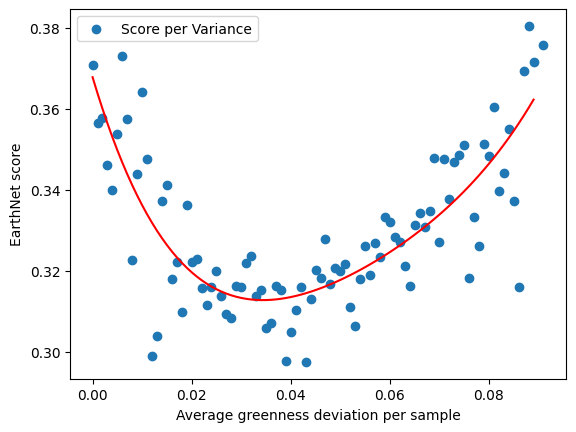

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# degree 2 polynomial fit or quadratic fit
model = np.poly1d(np.polyfit(VGrouped.index,VGrouped.values, 4))
  
# polynomial line visualization
polyline = np.arange(0, 0.09, 0.001)
plt.scatter(VGrouped.index,VGrouped.values, label='Score per Variance')
plt.plot(polyline, model(polyline),color='red')

plt.ylabel("EarthNet score")
plt.xlabel("Average greenness deviation per sample")

plt.legend()
plt.show()

In [36]:
VGrouped1.index.max

<bound method IndexOpsMixin.max of Float64Index([0.001, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,  0.01,
              0.011,
              ...
              0.109,  0.11, 0.111, 0.116, 0.117, 0.119, 0.121, 0.122, 0.124,
              0.132],
             dtype='float64', name='sample_std', length=115)>

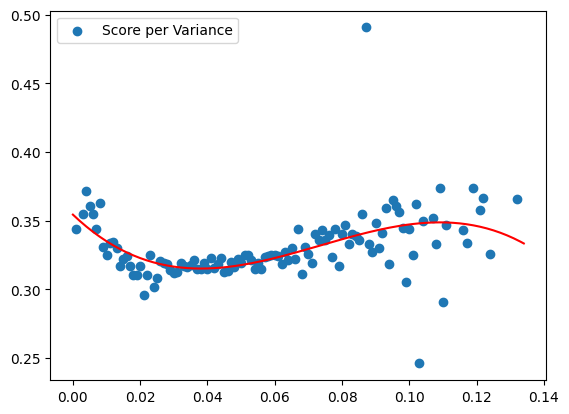

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# degree 2 polynomial fit or quadratic fit
model = np.poly1d(np.polyfit(VGrouped1.index,VGrouped1.values, 3))
  
# polynomial line visualization
polyline = np.arange(0, 0.135, 0.001)
plt.scatter(VGrouped1.index,VGrouped1.values, label='Score per Variance')
plt.plot(polyline, model(polyline),color='red')

plt.legend()
plt.show()

In [34]:
LCPercentages = pd.read_csv(r"C:\Users\jeroe\Documents\Masterthesis\weather2land\code\src\models\pt_convlstm\LandCoverPercentages.csv")
LCPercentages = LCPercentages.round(3)
LCPercentages['Cropland40'] = LCPercentages['Cropland40'].round()
LCPercentages

,Unnamed: 0,Tile,TreeCover10,Shrubland20,Grassland30,Cropland40,Built_Up50,BareSparseVegetation60,SnowIce70,PermanentWaterBodies80,HerbaceousWetland90,Mangroves95,MossLichen100,ENS score,Average STD
0,0,29SND,40.812,4.735,41.186,9.0,2.506,0.239,0.0,1.706,0.165,0.0,0.000,0.341,0.043
1,1,29SPC,29.315,4.094,51.088,12.0,0.845,0.140,0.0,2.247,0.000,0.0,0.000,0.332,0.044
2,2,29SQB,26.467,9.262,25.103,28.0,2.552,1.744,0.0,4.094,2.955,0.0,0.000,0.349,0.033
3,3,29TNE,56.279,5.040,22.050,2.0,4.037,0.368,0.0,9.596,0.203,0.0,0.000,0.338,0.051
4,4,29TPE,34.806,6.843,51.945,4.0,1.347,0.130,0.0,0.968,0.000,0.0,0.000,0.296,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,34TFN,61.136,0.002,25.140,11.0,2.298,0.125,0.0,0.506,0.034,0.0,0.000,0.307,0.059
78,78,34TFP,36.419,0.007,17.889,42.0,1.488,0.034,0.0,1.538,0.251,0.0,0.000,0.356,0.036
79,79,34TFT,42.121,0.040,31.541,24.0,1.813,0.068,0.0,0.313,0.049,0.0,0.000,0.334,0.038
80,80,34VCL,19.038,0.000,4.064,1.0,1.953,0.080,0.0,53.582,0.220,0.0,0.000,0.340,0.051


Cropland40
0.0     0.327750
1.0     0.323750
2.0     0.317500
3.0     0.301500
4.0     0.311333
5.0     0.321000
6.0     0.307250
7.0     0.320333
8.0     0.316000
9.0     0.326000
10.0    0.336667
11.0    0.307000
12.0    0.320333
13.0    0.317000
14.0    0.320500
16.0    0.294000
17.0    0.349000
19.0    0.348667
21.0    0.301500
23.0    0.272000
24.0    0.321333
26.0    0.301000
27.0    0.320500
28.0    0.297000
29.0    0.283000
30.0    0.325000
31.0    0.378000
32.0    0.310000
33.0    0.269000
34.0    0.287000
36.0    0.325667
37.0    0.331000
38.0    0.342000
39.0    0.322000
41.0    0.266000
42.0    0.356000
43.0    0.298250
44.0    0.307000
46.0    0.341000
48.0    0.327000
50.0    0.345000
52.0    0.305000
53.0    0.303000
Name: ENS score, dtype: float64

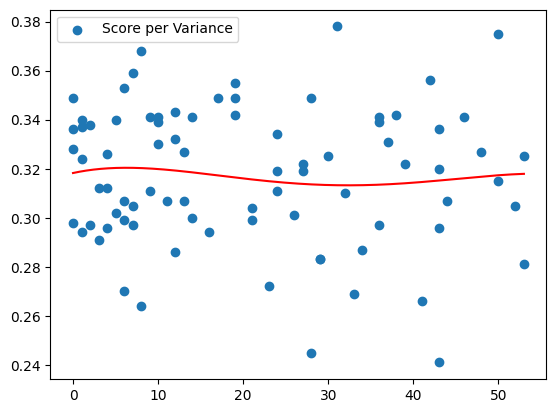

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# degree 2 polynomial fit or quadratic fit
model = np.poly1d(np.polyfit(LCPercentages['Cropland40'],LCPercentages['ENS score'], 4))
  
# polynomial line visualization
polyline = np.arange(LCPercentages['Cropland40'].min(), LCPercentages['Cropland40'].max(), 0.001)
plt.scatter(LCPercentages['Cropland40'],LCPercentages['ENS score'], label='Score per Variance')
plt.plot(polyline, model(polyline),color='red')

plt.legend()
plt.show()